# Loading Required Libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from Bio.SeqUtils.ProtParam import ProteinAnalysis

C:\Users\khush\AppData\Local\Temp\ipykernel_23048\3849057977.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Define the file path relative to the current notebook
file_path = './input/proteasomeDB.csv'

try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    print("Successfully loaded proteasomeDB.csv!\n")
    
    # Display basic information
    print("Dataset Overview:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    print("\nColumn names:")
    print(df.columns.tolist())
    
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nData types of columns:")
    print(df.dtypes)
    
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    
except FileNotFoundError:
    print("Error: proteasomeDB.csv not found in the input folder. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Successfully loaded proteasomeDB.csv!

Dataset Overview:
Number of rows: 1345
Number of columns: 24

Column names:
['runID', 'substrateID', 'substrateSeq', 'digestTime', 'pepSeq', 'scanNum', 'rank', 'ionScore', 'qValue', 'charge', 'PTM', 'replicate', 'filename', 'sampleName', 'sampleDate', 'protIsotype', 'substrateOrigin', 'species', 'instrument', 'fragmentation', 'location', 'productType', 'spliceType', 'positions']

First 5 rows of the dataset:
       runID substrateID             substrateSeq  digestTime  \
0  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
1  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
2  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
3  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   
4  TSN2-20-1        TSN2  VSRQLRTKAWNRQLYPEWTEAQR          20   

              pepSeq  scanNum  rank  ionScore  qValue  charge  ... sampleDate  \
0       QLYPEWTEAQQL    14459     1     20.15  0.0097       2  ...   25.03.21

In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
runID                 0
substrateID           0
substrateSeq          0
digestTime            0
pepSeq                0
scanNum               0
rank                  0
ionScore              0
qValue                0
charge                0
PTM                1161
replicate             0
filename              0
sampleName            0
sampleDate            0
protIsotype           0
substrateOrigin       0
species               0
instrument            0
fragmentation         0
location              0
productType           0
spliceType          475
positions             0
dtype: int64


In [4]:
df.head()


,runID,substrateID,substrateSeq,digestTime,pepSeq,scanNum,rank,ionScore,qValue,charge,...,sampleDate,protIsotype,substrateOrigin,species,instrument,fragmentation,location,productType,spliceType,positions
0,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,QLYPEWTEAQQL,14459,1,20.15,0.0097,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,revCis;trans,13_22_4_5;13_22_13_14
1,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,TEAQLYPEWTE,13067,1,20.19,0.0096,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,trans;trans,19_22_14_20;19_21_13_20
2,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,VSRQLQLY,7000,1,20.20,0.0095,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,1_5_13_15
3,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,SKAWNRQLYPEWTEAQR,5649,1,20.25,0.0140,3,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,2_2_8_23
4,TSN2-20-1,TSN2,VSRQLRTKAWNRQLYPEWTEAQR,20,QLYPEWEA,12523,1,20.39,0.0091,2,...,25.03.21,20S K562,P40967-2|PMEL[35-57],human,Fusion,HCD,KCL,PSP,cis,13_18_20_21


In [5]:
print("Columns in the dataset:")
for col in df.columns:
    print(f"- {col}")



Columns in the dataset:
- runID
- substrateID
- substrateSeq
- digestTime
- pepSeq
- scanNum
- rank
- ionScore
- qValue
- charge
- PTM
- replicate
- filename
- sampleName
- sampleDate
- protIsotype
- substrateOrigin
- species
- instrument
- fragmentation
- location
- productType
- spliceType
- positions


In [6]:
# Drop the 'filename' column which contains the file name
df = df.drop('filename', axis=1)

# Verify the column was dropped
print("\nColumns after dropping 'filename':")
print(df.columns.tolist())


Columns after dropping 'filename':
['runID', 'substrateID', 'substrateSeq', 'digestTime', 'pepSeq', 'scanNum', 'rank', 'ionScore', 'qValue', 'charge', 'PTM', 'replicate', 'sampleName', 'sampleDate', 'protIsotype', 'substrateOrigin', 'species', 'instrument', 'fragmentation', 'location', 'productType', 'spliceType', 'positions']


# Examine the spliceType column which indicates the type of splicing

In [7]:

print("\nSplice types in the dataset:")
print(df['spliceType'].value_counts())


Splice types in the dataset:
spliceType
revCis                         371
trans                          194
cis                            126
revCis;revCis                   62
trans;trans                     26
revCis;trans                    18
cis;trans                       18
cis;cis;cis;cis                 11
revCis;trans;revCis;trans        9
trans;cis                        7
trans;revCis                     7
revCis;trans;revCis              6
revCis;revCis;revCis;revCis      6
trans;cis;trans                  4
revCis;revCis;revCis;cis         2
revCis;trans;cis                 2
trans;trans;trans;trans          1
Name: count, dtype: int64


*we can simplify the splicetypes

# Categorization of Amino Acids

In [8]:

pepSeq_list = df['pepSeq'].tolist()

print(pepSeq_list)


['QLYPEWTEAQQL', 'TEAQLYPEWTE', 'VSRQLQLY', 'SKAWNRQLYPEWTEAQR', 'QLYPEWEA', 'AWNRQLYQL', 'YPEWTEAAW', 'SAWNRQLYPEWTEA', 'LYPEWTEWNRQ', 'SRQLRTKAWNRQLYPEW', 'QLYPEWTEAVSRQLRT', 'KQLYPEW', 'QLYPEWRTK', 'TKAWNRQL', 'EAQQLYPEWTEAQR', 'QLYPEWTEARTKAWNR', 'PEWTEAQY', 'QLYPEWVSRQLRTK', 'QLRTKAWNRQLYPEW', 'VSRQLRTQLYPEWTEA', 'YPEWTEAY', 'AWNRQLYPEWTEVS', 'QLYPEWTEAVSRQLRTKA', 'TEAVSRQLRTKAWNR', 'QLYPEWTEV', 'KAWQLYPEW', 'VSAWNRQLYPEWTEA', 'AWNRQLAW', 'QLYPEWTEAQLY', 'YPEWKA', 'QLKAWNRQL', 'TEAVSRQLRTKAW', 'AWKAWNR', 'QLQLYPEWT', 'PEWKAWNR', 'SRQLYPEWTEA', 'RTKAWNRQQLY', 'QLYPEWTEASRQLRT', 'NRQLYP', 'TEQLYPEWTEA', 'YPEWTEQLYPEW', 'PEWTEAW', 'AWQLYPEWTE', 'AWLYPEWTEAQR', 'SRRTKAWNRQLYPEWTEAQR', 'VSRQLRTKAWNRQL', 'QLYQLYPEW', 'QLQLYPEWTE', 'AWNRQLQL', 'RTKAWNRQLYPEWTEAVS', 'QLYPEWTEAVSRQLR', 'WNRQLYPEWQL', 'VSQLRTKAW', 'LYPEWTEAVSRQLRTK', 'PEWTEARTKAW', 'QLAWNRQLYPEWTEA', 'VNRQLYPEWTEA', 'VSRQLRTKQLYPEWTEA', 'YPEWTEAKA', 'QLYPEWTNRQL', 'RTKAWNRQLV', 'QLYPEWTEAN', 'SRQLAWNR', 'NRQLLRTKAWNR', 'YPE

This function calculates how frequently each amino acid appears across all peptides in the dataset.

In [14]:
def amino_acid_composition(sequences):
    aa_counts = Counter()
    total_length = 0
    for seq in sequences:
        if isinstance(seq, str):  
            aa_counts.update(seq)
            total_length += len(seq)
    return aa_counts, total_length


#Takes a list of peptide sequences as input
#Creates a Counter object to track amino acid occurrences
#Loops through each sequence, checking that it's a string
#Updates the counter with each amino acid in the sequence
#Keeps track of the total length of all sequences
#Returns both the counts and total length

This converts raw counts into percentages, showing what proportion of all amino acids is represented by each type.

In [16]:
aa_counts, total_length = amino_acid_composition(pepSeq_list)

aa_freq = {aa: count / total_length for aa, count in aa_counts.items()}

#Calls the function on our list of peptide sequences (pepSeq_list)
#Normalizes the counts by dividing by the total length
#Creates a dictionary with amino acids as keys and their frequencies as values



to analyze the distribution of peptide lengths in the dataset

In [17]:

peptide_lengths = [len(seq) if isinstance(seq, str) else 0 for seq in pepSeq_list]

This gives us the molecular weight distribution of the peptide.Provides both visual and numerical summaries of the peptide properties.

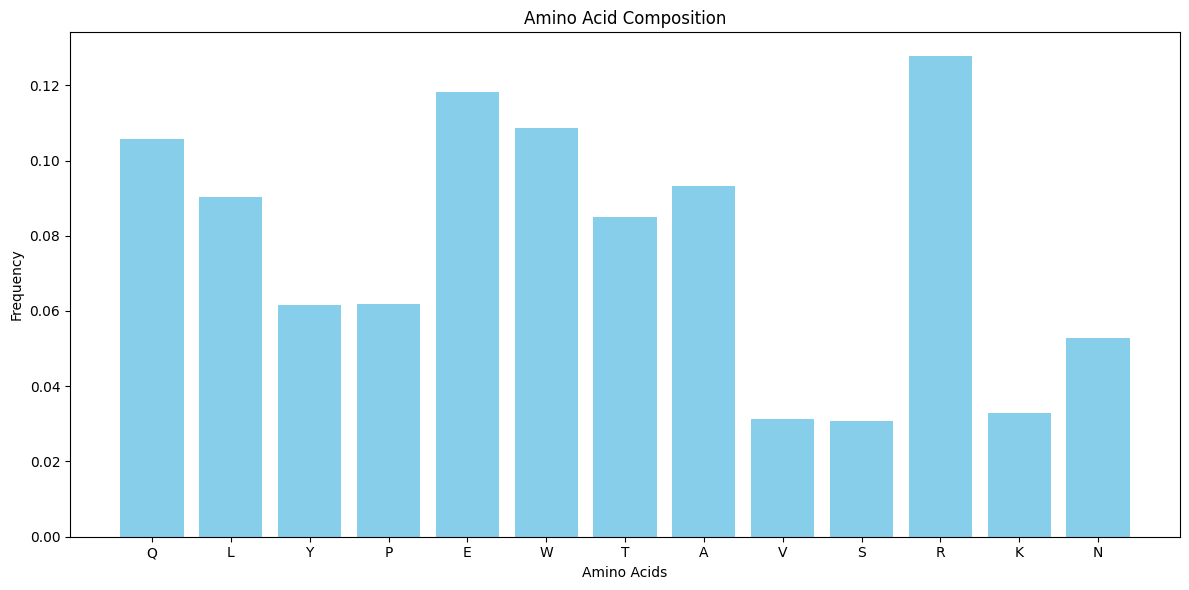

Total Peptides: 1345
Average Peptide Length: 11.87
Average Molecular Weight: 1519.13 Da


In [19]:
try:
    weights = []
    for seq in pepSeq_list:
        if isinstance(seq, str):
            # Replace non-standard amino acids
            clean_seq = ''.join([aa if aa in 'ACDEFGHIKLMNPQRSTVWY' else 'X' for aa in seq])
            # Replace X with A for analysis (simplification)
            clean_seq = clean_seq.replace('X', 'A')
            weights.append(ProteinAnalysis(clean_seq).molecular_weight())
    
    # Plot Amino Acid Composition
    plt.figure(figsize=(12, 6))
    plt.bar(aa_freq.keys(), aa_freq.values(), color='skyblue')
    plt.xlabel('Amino Acids')
    plt.ylabel('Frequency')
    plt.title('Amino Acid Composition')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

        
    # Print Key Stats
    print(f"Total Peptides: {len(pepSeq_list)}")
    print(f"Average Peptide Length: {sum(peptide_lengths) / len(peptide_lengths):.2f}")
    print(f"Average Molecular Weight: {sum(weights) / len(weights):.2f} Da")
    
except Exception as e:
    print(f"Error calculating molecular weights: {str(e)}")
    print("Make sure Biopython is installed: pip install biopython")



The bar chart displays the frequency (percentage) of each amino acid across all peptides in the dataset. Each bar represents one of the 20 standard amino acids, with the height indicating how often that amino acid appears.

(The distribution reveals biases in amino acid usage)

Significance:-Proteasome Preferences:
If certain amino acids are overrepresented (taller bars), this suggests the proteasome preferentially generates peptides containing these amino acids
If certain amino acids are underrepresented (shorter bars), the proteasome might avoid cutting near these amino acids
Comparison to Natural Abundance:
By comparing this distribution to the natural abundance of amino acids in proteins, we can identify which amino acids are enriched or depleted in spliced peptides
For example, if leucine (L) makes up 9% of amino acids in typical proteins but 15% in our peptides, this suggests enrichment


Splicing Mechanism Insights:
Different amino acid preferences might be associated with different splicing mechanisms
For example, hydrophobic amino acids might be more common in cis-spliced peptides.

Biological Relevance:
The amino acid composition affects how these peptides might function biologically
For example, peptides rich in hydrophobic amino acids might interact differently with immune receptors 


Amino Acid Category Counts:
Hydrophobic(aliphatic): 3427 (21.47%)
Hydrophobic(aromatic): 2717 (17.02%)
Hydrophilic: 4380 (27.44%)
Acidic: 1887 (11.82%)
Basic: 2561 (16.05%)
Special: 989 (6.20%)

This bar chart is showing the percentage distribution of amino acids across six functional categories


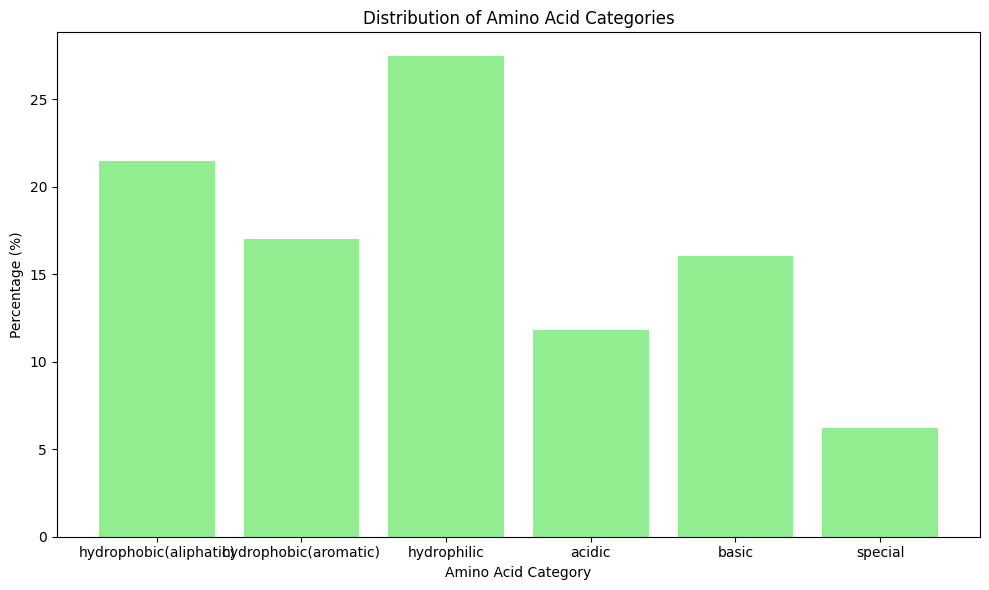

In [22]:
# Amino Acid Categorization Schema
def categorize_amino_acids(sequences):
    """
    Categorize amino acids in peptide sequences based on their properties.
    
    Categories:
    - Hydrophobic(aliphatic): A, V, L, I, M
    - Hydrophobic(aromatic): F, W, Y
    - Hydrophilic: S, T, N, Q, C
    - Acidic: D, E
    - Basic: K, R, H
    - Special: G, P
    
    Returns a dictionary with category counts and percentages.
    """
    categories = {
        'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
        'hydrophobic(aromatic)': ['F', 'W', 'Y'],
        'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
        'acidic': ['D', 'E'],
        'basic': ['K', 'R', 'H'],
        'special': ['G', 'P']
    }
    # Initializes counters for each category
    category_counts = {cat: 0 for cat in categories}
    total_aa = 0
    
    # Loops through each sequence and each amino acid. Assigns each amino acid to its appropriate category 
    for seq in sequences:
        if isinstance(seq, str):
            for aa in seq:
                total_aa += 1
                for cat, aa_list in categories.items():
                    if aa in aa_list:
                        category_counts[cat] += 1
                        break
    
    # Calculates the percentage of each category in the overall dataset
    category_percentages = {cat: count / total_aa * 100 if total_aa > 0 else 0 
                           for cat, count in category_counts.items()}
    
    return category_counts, category_percentages, total_aa

# Apply the categorization
category_counts, category_percentages, total_aa = categorize_amino_acids(pepSeq_list)

# Display results
print("\nAmino Acid Category Counts:")
for cat, count in category_counts.items():
    print(f"{cat.capitalize()}: {count} ({category_percentages[cat]:.2f}%)")


print("\nThis bar chart is showing the percentage distribution of amino acids across six functional categories")
#Visualize amino acid categories
plt.figure(figsize=(10, 6))
plt.bar(category_percentages.keys(), category_percentages.values(), color='lightgreen')
plt.xlabel('Amino Acid Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Amino Acid Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





Biochemical Properties of Spliced Peptides:-Hydrophobic (water-repelling),Hydrophilic (water-loving), Charged (acidic or basic), Structurally unique (special).

This categoriztion is for?
Predicting peptide behavior: The category distribution helps predict how peptides might behave in biological systems
Understanding splicing mechanisms: Different category distributions between splicing types provide clues about the underlying mechanisms
Designing peptide-based therapeutics: Knowledge of which categories are common in naturally spliced peptides can guide the design of synthetic peptides
Improving prediction algorithms: These patterns can be incorporated into algorithms that predict which peptides are likely to be generated through splicing.


If certain categories are overrepresented, it suggests the proteasome preferentially generates peptides rich in those amino acid types
If certain categories are underrepresented, it suggests the proteasome might avoid cutting near those amino acid types.



In [35]:
print("\nSplice types in the dataset:")
print(df['spliceType'].value_counts())


Splice types in the dataset:
spliceType
revCis                         371
trans                          194
cis                            126
revCis;revCis                   62
trans;trans                     26
revCis;trans                    18
cis;trans                       18
cis;cis;cis;cis                 11
revCis;trans;revCis;trans        9
trans;cis                        7
trans;revCis                     7
revCis;trans;revCis              6
revCis;revCis;revCis;revCis      6
trans;cis;trans                  4
revCis;revCis;revCis;cis         2
revCis;trans;cis                 2
trans;trans;trans;trans          1
Name: count, dtype: int64



Distribution of splice categories:
spliceCategory
unknown         475
revCis          371
trans           194
cis             126
mixed            71
multi-revCis     68
multi-trans      27
multi-cis        11
complex           2
Name: count, dtype: int64


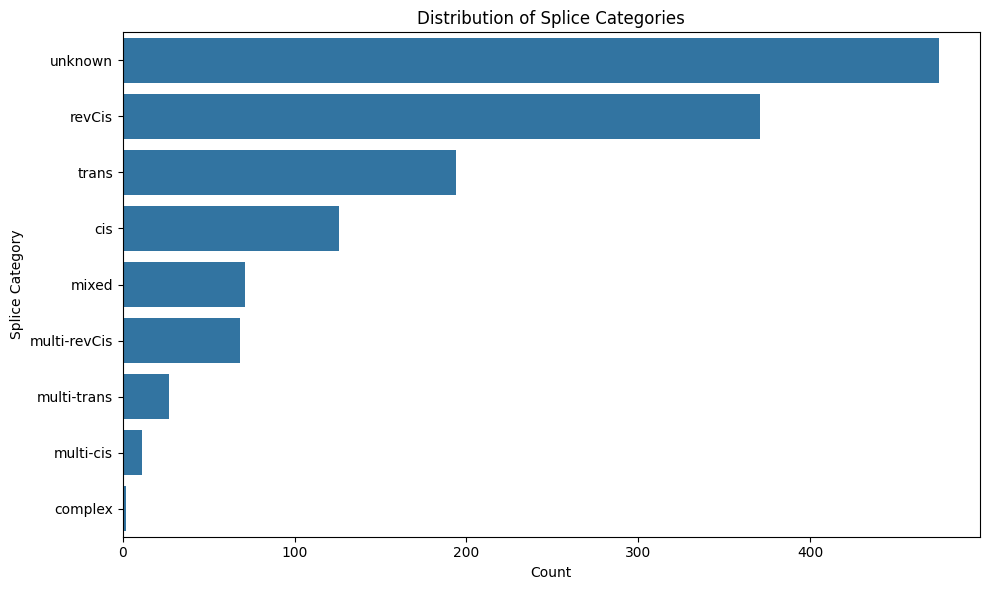

In [36]:
# Create simplified splice categories
def categorize_splice(x):
    if pd.isna(x):
        return 'unknown'
    if not isinstance(x, str):
        return 'other'
    
    # Single splice types
    if x == 'cis':
        return 'cis'
    if x == 'trans':
        return 'trans'
    if x == 'revCis':
        return 'revCis'
    
    # Multiple splice types
    if ';' in x:
        # Check for mixed types
        if 'cis' in x and 'trans' in x:
            return 'mixed'
        if 'revCis' in x and 'trans' in x:
            return 'mixed'
        
        # Same type multiple times
        if 'cis' in x and 'trans' not in x and 'revCis' not in x:
            return 'multi-cis'
        if 'trans' in x and 'cis' not in x and 'revCis' not in x:
            return 'multi-trans'
        if 'revCis' in x and 'cis' not in x and 'trans' not in x:
            return 'multi-revCis'
    
    # Default case
    return 'complex'

# Apply the categorization
df['spliceCategory'] = df['spliceType'].apply(categorize_splice)

# Display the distribution of categories
print("\nDistribution of splice categories:")
print(df['spliceCategory'].value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='spliceCategory', data=df, order=df['spliceCategory'].value_counts().index)
plt.title('Distribution of Splice Categories')
plt.xlabel('Count')
plt.ylabel('Splice Category')
plt.tight_layout()
plt.show()

In [37]:
# Check for missing values in spliceType column
missing_count = df['spliceType'].isna().sum()
print(f"Number of missing values in spliceType column: {missing_count}")

# Check for empty strings or whitespace
empty_string_count = (df['spliceType'] == '').sum()
whitespace_count = df['spliceType'].str.isspace().sum() if hasattr(df['spliceType'], 'str') else 0
print(f"Number of empty strings: {empty_string_count}")
print(f"Number of whitespace-only entries: {whitespace_count}")

# Check for other non-standard values
if not df['spliceType'].isna().all():  # Only if there are some non-NaN values
    unique_values = df['spliceType'].dropna().unique()
    print(f"Unique non-NaN values in spliceType: {len(unique_values)}")
    print("Sample of unique values:")
    print(unique_values[:10])  # Show first 10 unique values

Number of missing values in spliceType column: 475
Number of empty strings: 0
Number of whitespace-only entries: 0
Unique non-NaN values in spliceType: 17
Sample of unique values:
['revCis;trans' 'trans;trans' 'cis' 'revCis' 'trans' 'cis;trans'
 'cis;cis;cis;cis' 'revCis;trans;revCis' 'revCis;revCis;revCis;cis'
 'revCis;revCis']


*here how should i handle the unknown values.???????????????????

we could filter out?

The positions column often contains information that can be used to infer splice types?( in my opinion this can work best with us)

use Machine Learning to Predict Splice Types(train a model to predict the unknown ones)?



Otherwise....................

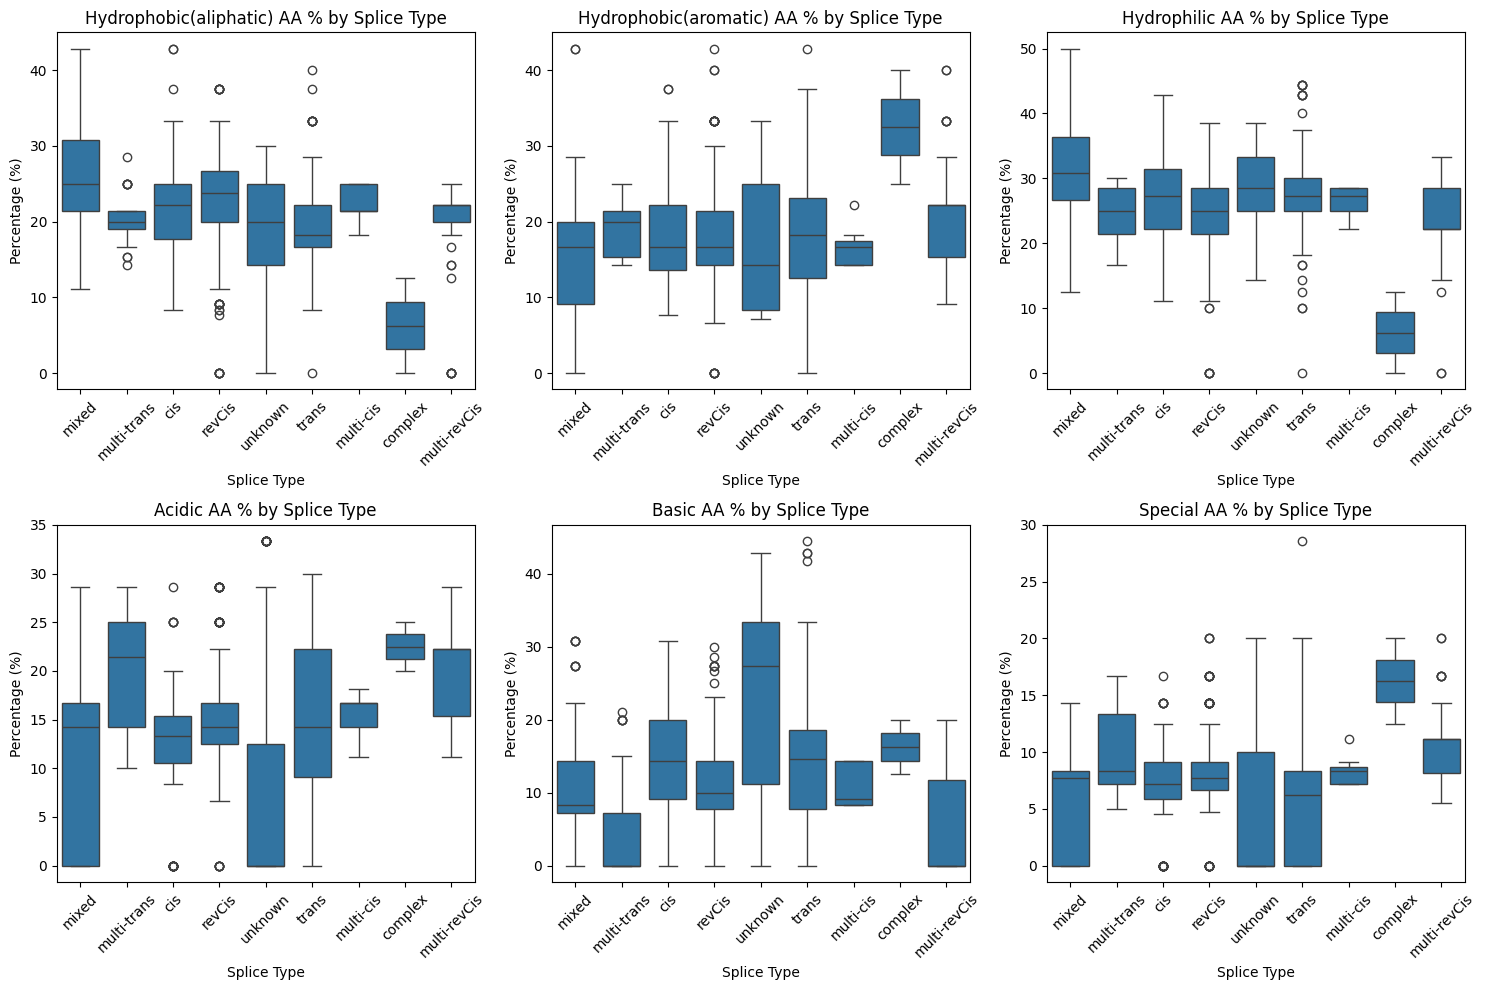


Statistical Analysis of Amino Acid Categories by Splice Type:
Hydrophobic(aliphatic): F=15.18, p-value=0.0000, Significant: Yes
Hydrophobic(aromatic): F=4.52, p-value=0.0000, Significant: Yes
Hydrophilic: F=19.73, p-value=0.0000, Significant: Yes
Acidic: F=60.33, p-value=0.0000, Significant: Yes
Basic: F=71.45, p-value=0.0000, Significant: Yes
Special: F=32.17, p-value=0.0000, Significant: Yes


In [38]:
# Analyze amino acid categories by splice type
if 'spliceCategory' in df.columns:
    # Create a function to calculate category percentages for a sequence
    def get_aa_category_percentages(seq):
        if not isinstance(seq, str) or len(seq) == 0:
            return {cat: 0 for cat in ['hydrophobic(aliphatic)','hydrophobic(aromatic)', 'hydrophilic', 'acidic', 'basic', 'special']}
        
        categories = {
            'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
            'hydrophobic(aromatic)': ['F', 'W', 'Y'],
            'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
            'acidic': ['D', 'E'],
            'basic': ['K', 'R', 'H'],
            'special': ['G', 'P']
        }
        
        # Initialize counters
        category_counts = {cat: 0 for cat in categories}
        
        # Converting to percentages normalizes for peptide length, allowing fair comparison between peptides of different sizes.

        for aa in seq:
            for cat, aa_list in categories.items():
                if aa in aa_list:
                    category_counts[cat] += 1
                    break
        
        # Calculates what percentage of the peptide belongs to each category
        return {cat: count / len(seq) * 100 for cat, count in category_counts.items()}
    
    # Applies the categorization function to every peptide sequence in the dataset
    category_percentages_by_seq = df['pepSeq'].apply(get_aa_category_percentages)
    
    # Creates new columns in the DataFrame for each category percentage
    for cat in ['hydrophobic(aliphatic)', 'hydrophobic(aromatic)', 'hydrophilic', 'acidic', 'basic', 'special']:
        df[f'{cat}_percent'] = category_percentages_by_seq.apply(lambda x: x[cat])
    
    # Visualize amino acid categories by splice type
    plt.figure(figsize=(15, 10))
    for i, cat in enumerate(['hydrophobic(aliphatic)_percent', 'hydrophobic(aromatic)_percent', 'hydrophilic_percent', 'acidic_percent', 
                            'basic_percent', 'special_percent'], 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='spliceCategory', y=cat, data=df)
        plt.title(f'{cat.replace("_percent", "").capitalize()} AA % by Splice Type')
        plt.xlabel('Splice Type')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

    

        # Statistical analysis of amino acid categories by splice type
    print("\nStatistical Analysis of Amino Acid Categories by Splice Type:")
    try:
        from scipy import stats
        
        for cat in ['hydrophobic(aliphatic)_percent', 'hydrophobic(aromatic)_percent', 'hydrophilic_percent', 'acidic_percent', 
                   'basic_percent', 'special_percent']:
            # Perform ANOVA
            categories = df['spliceCategory'].unique()
            groups = [df[df['spliceCategory'] == splice_cat][cat].dropna() for splice_cat in categories]
            
            # Only perform test if we have data in at least 2 groups
            valid_groups = [g for g in groups if len(g) > 0]
            if len(valid_groups) >= 2:
                f_stat, p_val = stats.f_oneway(*valid_groups)
                print(f"{cat.replace('_percent', '').capitalize()}: F={f_stat:.2f}, p-value={p_val:.4f}, Significant: {'Yes' if p_val < 0.05 else 'No'}")
            else:
                print(f"{cat.replace('_percent', '').capitalize()}: Insufficient data for statistical testing")
    except ImportError:
        print("SciPy not available. Please install SciPy using 'pip install scipy' to run statistical tests.")

*F-statistic:
Measures the ratio of between-group variance to within-group variance
Higher F-values suggest stronger differences between groups
An F-value of 1 would suggest no difference between groups

p-value:
The probability of observing the data if the null hypothesis were true
Lower p-values indicate stronger evidence against the null hypothesis
The conventional threshold is p < 0.05 (5% significance level)

Significance:
If p < 0.05: We reject the null hypothesis and conclude that the amino acid category percentage differs significantly between at least some splice types
If p ≥ 0.05: We fail to reject the null hypothesis, meaning we don't have sufficient evidence of a difference*

In [41]:
#It shows the median percentage of each amino acid category for each splice type, 
# making it easier to compare them quantitatively rather than just visually from the box plots

def print_amino_acid_composition_insights(df):

    print("=" * 80)
    print("AMINO ACID COMPOSITION ANALYSIS ACROSS SPLICE TYPES")
    print("=" * 80)
    
    # Check if we have the necessary columns
    required_columns = ['spliceCategory', 'hydrophobic(aliphatic)_percent', 
                        'hydrophobic(aromatic)_percent', 'hydrophilic_percent',
                        'acidic_percent', 'basic_percent', 'special_percent']
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Error: Missing required columns: {missing_columns}")
        return
    
    # Calculate median values for each category by splice type
    print("\nMedian Values by Splice Type:")
    print("-" * 50)
    
    splice_types = df['spliceCategory'].unique()
    categories = ['hydrophobic(aliphatic)', 'hydrophobic(aromatic)', 'hydrophilic', 
                 'acidic', 'basic', 'special']
    
    # Create a table of median values
    median_table = {}
    for splice_type in splice_types:
        subset = df[df['spliceCategory'] == splice_type]
        median_table[splice_type] = {}
        for cat in categories:
            col_name = f"{cat}_percent"
            if col_name in df.columns:
                median_table[splice_type][cat] = subset[col_name].median()
    
    # Print the table
    header = "Splice Type".ljust(15)
    for cat in categories:
        header += cat.capitalize().ljust(15)
    print(header)
    print("-" * 105)
    
    for splice_type in splice_types:
        row = splice_type.ljust(15)
        for cat in categories:
            if cat in median_table[splice_type]:
                value = f"{median_table[splice_type][cat]:.2f}%"
                row += value.ljust(15)
            else:
                row += "N/A".ljust(15)
        print(row)
    
print_amino_acid_composition_insights(df)

AMINO ACID COMPOSITION ANALYSIS ACROSS SPLICE TYPES

Median Values by Splice Type:
--------------------------------------------------
Splice Type    Hydrophobic(aliphatic)Hydrophobic(aromatic)Hydrophilic    Acidic         Basic          Special        
---------------------------------------------------------------------------------------------------------
mixed          25.00%         16.67%         30.77%         14.29%         8.33%          7.69%          
multi-trans    20.00%         20.00%         25.00%         21.43%         0.00%          8.33%          
cis            22.22%         16.67%         27.27%         13.33%         14.29%         7.14%          
revCis         23.81%         16.67%         25.00%         14.29%         10.00%         7.69%          
unknown        20.00%         14.29%         28.57%         0.00%          27.27%         0.00%          
trans          18.18%         18.18%         27.27%         14.29%         14.64%         6.25%          
multi


Calculating amino acid composition by splice type...


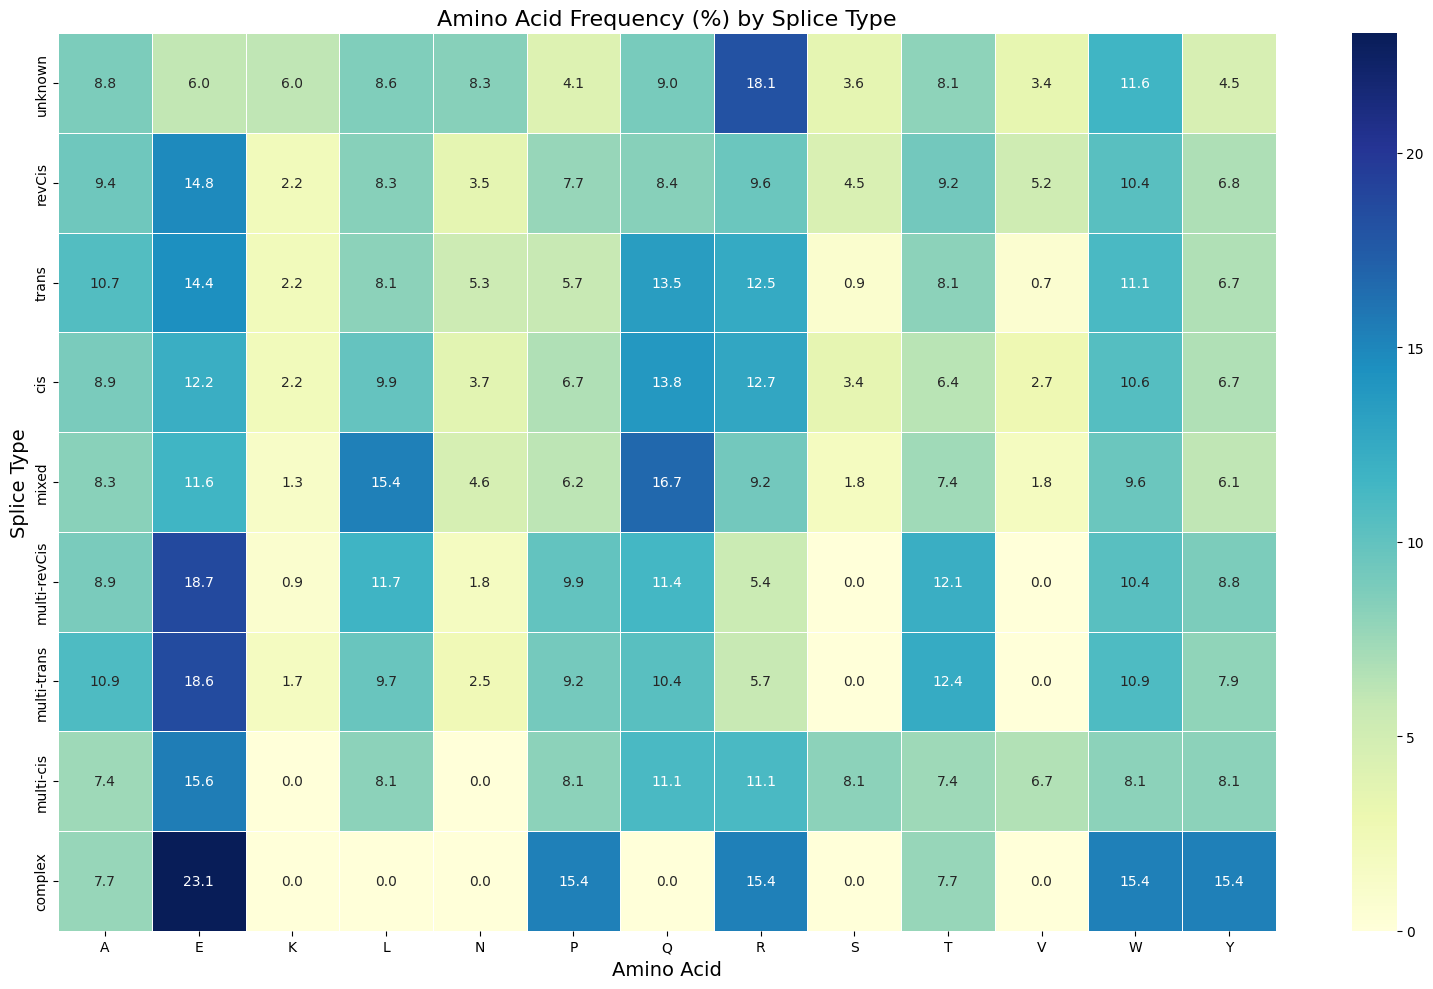


Calculating amino acid category percentages by splice type...


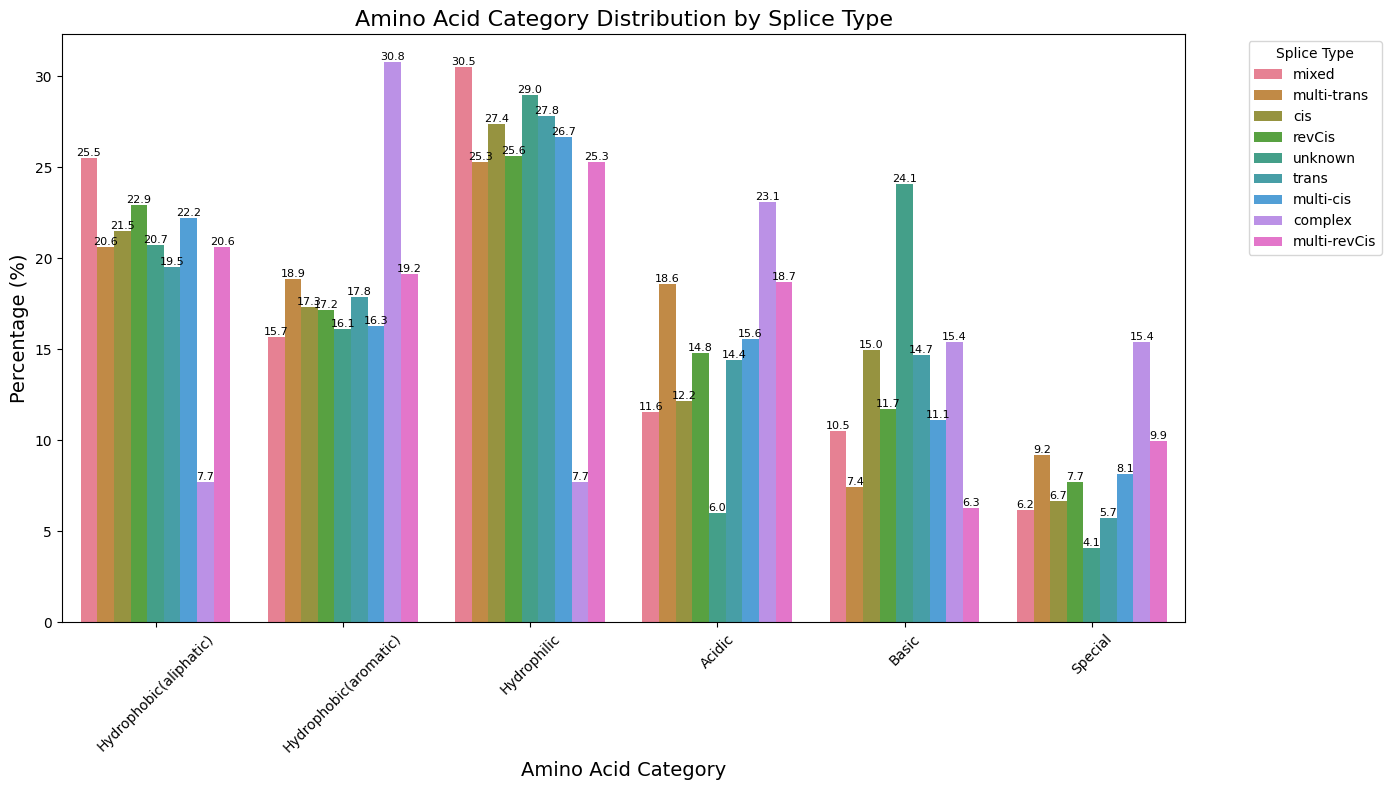

In [45]:
# Analyze relationship between splicing type and amino acid composition
def analyze_splicing_type_vs_composition(df):
    """Analyze how amino acid composition relates to splicing type"""
    # Check if required columns exist
    if 'pepSeq' not in df.columns:
        print("Error: 'pepSeq' column not found")
        return
    
    # Verify that spliceCategory column exists
    if 'spliceCategory' not in df.columns:
        print("Error: 'spliceCategory' column not found. Creating it now...")
        
        # Create simplified splice categories if not already done
        if 'spliceType' not in df.columns:
            print("Error: Neither 'spliceCategory' nor 'spliceType' column found")
            return
            
        # Define the categorization function based on your current categories
        def categorize_splice(x):
            if pd.isna(x):
                return 'unknown'
            if not isinstance(x, str):
                return 'unknown'
                
            # Single splice types
            if x == 'cis':
                return 'cis'
            if x == 'trans':
                return 'trans'
            if x == 'revCis':
                return 'revCis'
            
            # Multiple splice types
            if ';' in x:
                # Check for mixed types
                if 'cis' in x and 'trans' in x:
                    return 'mixed'
                if 'revCis' in x and 'trans' in x:
                    return 'mixed'
                
                # Same type multiple times
                if 'cis' in x and 'trans' not in x and 'revCis' not in x:
                    return 'multi-cis'
                if 'trans' in x and 'cis' not in x and 'revCis' not in x:
                    return 'multi-trans'
                if 'revCis' in x and 'cis' not in x and 'trans' not in x:
                    return 'multi-revCis'
            
            # Default case
            return 'complex'
        
        df['spliceCategory'] = df['spliceType'].apply(categorize_splice)
        print("Splice categories created.")
    
    # Use all categories including unknown
    df_analysis = df.copy()
    
    # Get unique splice types for analysis
    splice_types = df_analysis['spliceCategory'].unique()
    
    # Initialize dictionaries to store composition by splice type
    aa_composition_by_type = {splice_type: Counter() for splice_type in splice_types}
    total_length_by_type = {splice_type: 0 for splice_type in splice_types}
    
    # Calculate composition
    print("\nCalculating amino acid composition by splice type...")
    for _, row in df_analysis.iterrows():
        if pd.isna(row['pepSeq']) or pd.isna(row['spliceCategory']):
            continue
        
        splice_type = row['spliceCategory']
        seq = row['pepSeq']
        
        if isinstance(seq, str):
            aa_composition_by_type[splice_type].update(seq)
            total_length_by_type[splice_type] += len(seq)
    
    # Calculate frequencies
    aa_freq_by_type = {}
    for splice_type in splice_types:
        if total_length_by_type[splice_type] > 0:
            aa_freq_by_type[splice_type] = {
                aa: count / total_length_by_type[splice_type] * 100 
                for aa, count in aa_composition_by_type[splice_type].items()
            }
    
    # Plot amino acid frequencies by splice type
    all_aa = set()
    for freqs in aa_freq_by_type.values():
        all_aa.update(freqs.keys())
    all_aa = sorted(all_aa)
    
    # Create DataFrame for plotting
    plot_data = []
    for splice_type, freqs in aa_freq_by_type.items():
        for aa in all_aa:
            plot_data.append({
                'Splice Type': splice_type,
                'Amino Acid': aa,
                'Frequency (%)': freqs.get(aa, 0)
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Plot heatmap
    plt.figure(figsize=(16, 10))
    pivot_table = plot_df.pivot(index='Splice Type', columns='Amino Acid', values='Frequency (%)')
    
    # Get splice category counts for ordering
    splice_category_counts = df['spliceCategory'].value_counts()
    
    # Reorder rows to match the frequency of splice categories
    if all(cat in pivot_table.index for cat in splice_category_counts.index):
        pivot_table = pivot_table.reindex(splice_category_counts.index)
    
    # Create heatmap with annotations
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
    plt.title('Amino Acid Frequency (%) by Splice Type', fontsize=16)
    plt.xlabel('Amino Acid', fontsize=14)
    plt.ylabel('Splice Type', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Define amino acid categories with more detailed hydrophobic classification
    categories = {
        'hydrophobic(aliphatic)': ['A', 'V', 'L', 'I', 'M'],
        'hydrophobic(aromatic)': ['F', 'W', 'Y'],
        'hydrophilic': ['S', 'T', 'N', 'Q', 'C'],
        'acidic': ['D', 'E'],
        'basic': ['K', 'R', 'H'],
        'special': ['G', 'P']
    }
    
    # Calculate category percentages by splice type
    print("\nCalculating amino acid category percentages by splice type...")
    category_pct_by_type = {}
    for splice_type, freqs in aa_freq_by_type.items():
        category_counts = {cat: 0 for cat in categories}
        for aa, freq in freqs.items():
            for cat, aa_list in categories.items():
                if aa in aa_list:
                    category_counts[cat] += freq
                    break
        category_pct_by_type[splice_type] = category_counts
    
    # Plot category percentages by splice type
    cat_data = []
    for splice_type, cat_pcts in category_pct_by_type.items():
        for cat, pct in cat_pcts.items():
            cat_data.append({
                'Splice Type': splice_type,
                'Category': cat.capitalize(),
                'Percentage': pct
            })
    
    cat_df = pd.DataFrame(cat_data)
    
    # Create bar plot
    plt.figure(figsize=(14, 8))
    
    # Use a custom color palette
    custom_palette = sns.color_palette("husl", len(splice_types))
    
    # Create the bar plot
    ax = sns.barplot(x='Category', y='Percentage', hue='Splice Type', data=cat_df, palette=custom_palette)
    
    # Customize the plot
    plt.title('Amino Acid Category Distribution by Splice Type', fontsize=16)
    plt.xlabel('Amino Acid Category', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(title='Splice Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Return the calculated data for further analysis
    return aa_freq_by_type, category_pct_by_type

# Run the analysis
aa_freq_by_splice, category_pct_by_splice = analyze_splicing_type_vs_composition(df)

# Length Analysis 


In [46]:
"""
To be....
"""

'\nTo be....\n'

# Match Peptides to the Parent Protein (substrateSeq and positions)

# Analyzing Peptide-Substrate Relationships